### Polynomial  regression

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [79]:
#  Create the non linear data set
#  the data will be a quadratic equation
x=6 * np.random.rand(100,1)-3
y=0.5*x**2 + 1.5*x +2+np.random.randn(100,1)

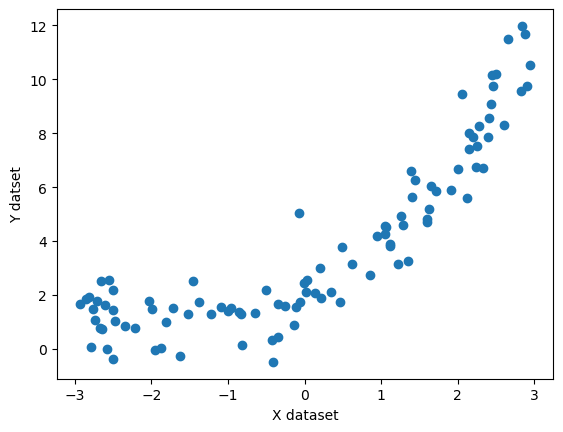

In [80]:
plt.scatter(x,y)

plt.xlabel("X dataset")
plt.ylabel("Y datset")
plt.show()


In [81]:
# Step 1 split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [82]:
# step 2 they are already standardised
#  so we will implement Simple linear regreesion
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)
pred=regression.predict(x_test)


In [83]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
score

0.6021673384271966

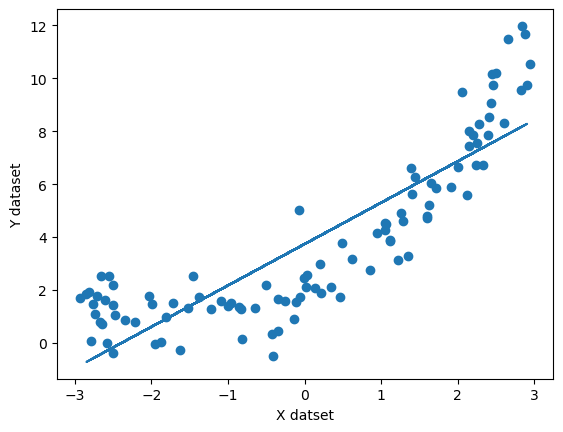

In [84]:
#  let visualize this model
plt.plot(x_train,regression.predict(x_train))
plt.scatter(x,y)
plt.xlabel("X datset")
plt.ylabel("Y dataset")
plt.show()

In [85]:
#  lets apply polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [86]:
ploy=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=ploy.fit_transform(x_train)
x_test_poly=ploy.transform(x_test)

In [87]:
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9087890101799171


In [88]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.59420711 0.50709145]]
[1.94435455]


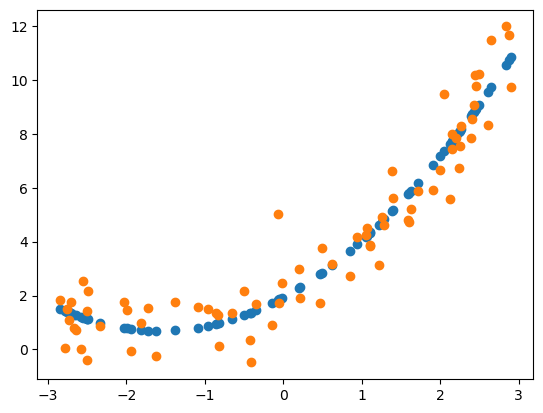

In [89]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)
plt.show()

In [90]:
#  make the degree 3
ploy=PolynomialFeatures(degree=3,include_bias=True)
x_train_poly=ploy.fit_transform(x_train)
x_test_poly=ploy.transform(x_test)

In [91]:
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8978932126173131


In [92]:
#  Prediction of new data set
n_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=ploy.transform(n_new)

In [93]:
regression.predict(x_new_poly)

array([[ 1.19597587],
       [ 1.1887003 ],
       [ 1.1814315 ],
       [ 1.17417876],
       [ 1.16695135],
       [ 1.15975857],
       [ 1.1526097 ],
       [ 1.14551403],
       [ 1.13848084],
       [ 1.13151943],
       [ 1.12463908],
       [ 1.11784907],
       [ 1.1111587 ],
       [ 1.10457724],
       [ 1.098114  ],
       [ 1.09177824],
       [ 1.08557927],
       [ 1.07952637],
       [ 1.07362882],
       [ 1.06789591],
       [ 1.06233693],
       [ 1.05696116],
       [ 1.05177789],
       [ 1.04679642],
       [ 1.04202601],
       [ 1.03747597],
       [ 1.03315558],
       [ 1.02907413],
       [ 1.02524089],
       [ 1.02166517],
       [ 1.01835624],
       [ 1.0153234 ],
       [ 1.01257592],
       [ 1.0101231 ],
       [ 1.00797422],
       [ 1.00613858],
       [ 1.00462545],
       [ 1.00344412],
       [ 1.00260389],
       [ 1.00211403],
       [ 1.00198384],
       [ 1.00222259],
       [ 1.00283959],
       [ 1.00384411],
       [ 1.00524544],
       [ 1

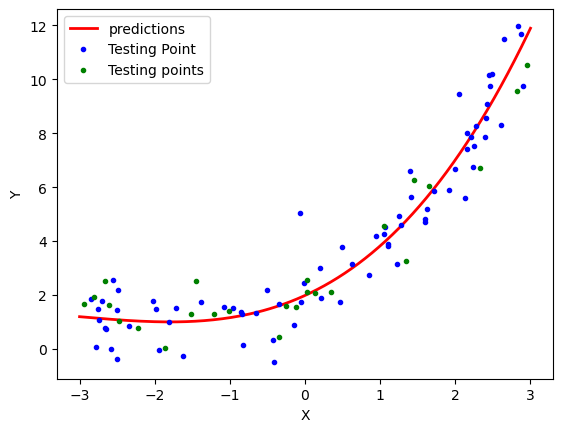

In [94]:
y_new=regression.predict(x_new_poly)
plt.plot(n_new,y_new,"r-",linewidth=2,label="predictions")
plt.plot(x_train,y_train,"b.",label="Testing Point")
plt.plot(x_test,y_test,"g.",label="Testing points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#  pipline concept

In [97]:
from sklearn.pipeline import Pipeline
def ploy_regression(degree):
    n_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    line_reg=LinearRegression()
    ploy_regression=Pipeline([
        ("poly_features",poly_features),
        ("line_reg",line_reg)
    ])

    ploy_regression.fit(x_train,y_train)
    y_pred_new=ploy_regression.predict(n_new)
    # ploting prediction line
    plt.plot(n_new,y_pred_new,"r-",linewidth=2,label="predictions")
    plt.plot(x_train,y_train,"b.",label="Testing Point")
    plt.plot(x_test,y_test,"g.",label="Testing points")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.axis([-4,4,0,10])
    plt.show()

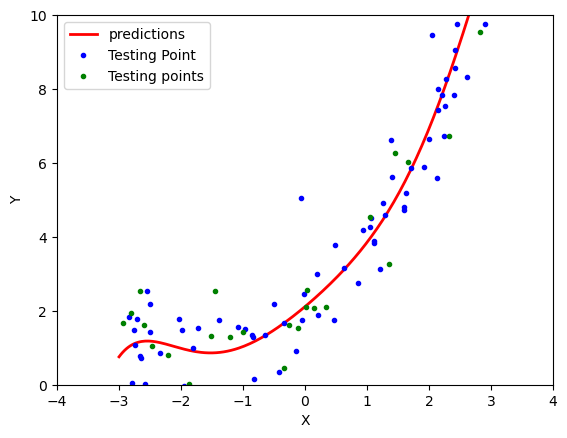

In [105]:
ploy_regression(6)